# Functions

In [3]:
import numpy as np
import csv 
from PIL import Image
import os,sys

def dimensionImages(train_imgs):
  dimensionImgs = []
  for i in train_imgs:
    dimensionImgs.append(i.reshape(100,100))
  
  return dimensionImgs


def flattenImages(imgArray):
  flattenImgsTrain = []
  for i in imgArray:
    flattenImgsTrain.append(i.reshape(-1))
  
  return flattenImgsTrain

def deleteLabel(label):
  return np.where(label==2,1,label)

## Import datas

In [5]:
# Import test set
test_label=np.genfromtxt('/content/drive/MyDrive/test_label.csv', delimiter=',')
test_feature=np.genfromtxt('/content/drive/MyDrive/test_feature.csv', delimiter=',')
# Dimension test set
test_feature=dimensionImages(test_feature)

# Import train set
train_label=np.genfromtxt('/content/drive/MyDrive/train_label.csv', delimiter=',')
train_feature=np.genfromtxt('/content/drive/MyDrive/train_feature.csv', delimiter=',')
# Dimension train set
train_feature=dimensionImages(train_feature)

# Import train set
val_label=np.genfromtxt('/content/drive/MyDrive/val_label.csv', delimiter=',')
val_feature=np.genfromtxt('/content/drive/MyDrive/val_feature.csv', delimiter=',')
# Dimension val set
val_feature=dimensionImages(val_feature)

# Model 
## KNN

In [7]:
# Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


train_feature=flattenImages(train_feature)
test_feature=flattenImages(test_feature)
val_feature=flattenImages(val_feature)

### KNN 3 neighbors

KNN 3 neighbors
Accuracy
0.7564102564102564
Confusion Matrix
[[ 86 148]
 [  4 386]]
True Positive Rate
0.9897435897435898
True Negative Rate
0.7228464419475655
False Negative Rate
0.044444444444444446
False Positive Rate
0.27715355805243447


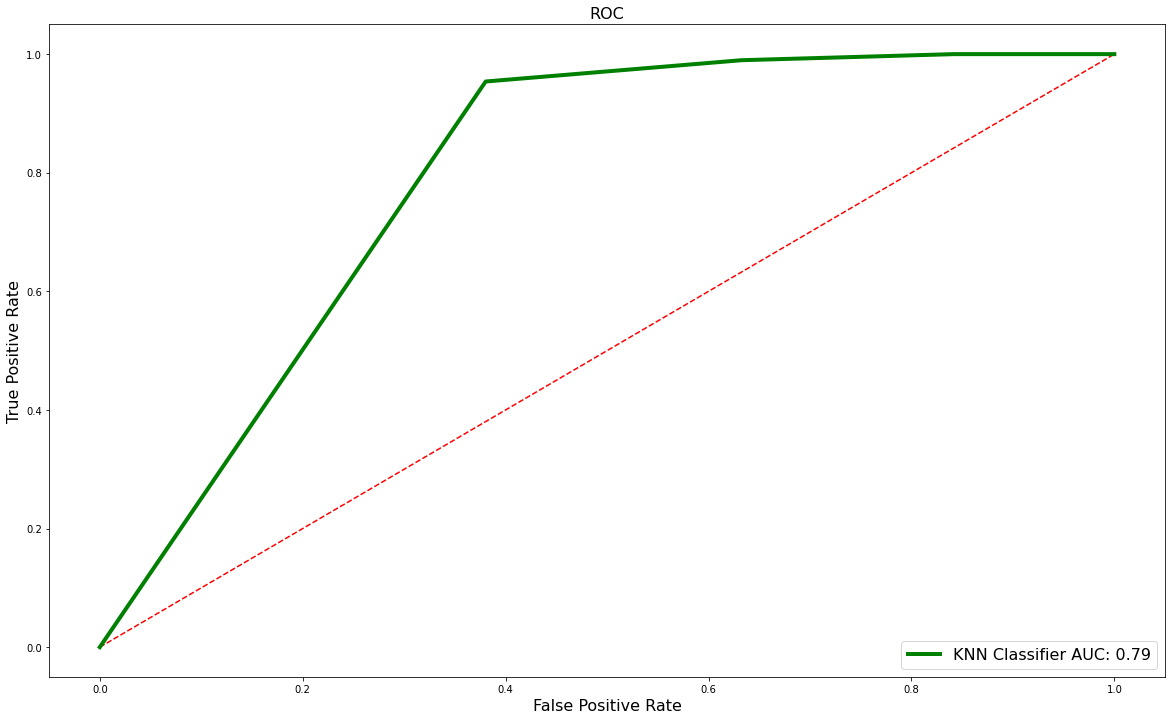

In [5]:
### Model

train_label=deleteLabel(train_label)
test_label=deleteLabel(test_label)

classifier = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
classifier.fit(train_feature,train_label)


### Predict - multiple values
y_true = test_label
y_pred = classifier.predict(test_feature)

### Metrics
print("KNN 3 neighbors")
#### Accuracy
acc = accuracy_score(y_true,y_pred)
print("Accuracy")
print(acc)

#### Confusion matrix
cm = confusion_matrix(y_true,y_pred)
print("Confusion Matrix")
print(cm)

#### True Positive Rate (recall)
print("True Positive Rate")
print(recall_score(y_true, y_pred))

#### True Negative Rate
print("True Negative Rate")
tnr=cm[1][1]/(cm[1][1]+cm[0][1])
print(tnr)

#### False Negative Rate
print("False Negative Rate")
fnr=cm[1][0]/(cm[0][0]+cm[1][0])
print(fnr)

#### False Positif Rate
print("False Positive Rate")
fpr = cm[0][1]/(cm[0][1]+cm[1][1])
print(fpr)

# Cross validation 
#cvs=cross_val_score(classifier,train_feature,train_label,cv=10)
#print("Cross validation score")
#print(cvs)


# ROC
probs =  classifier.predict_proba(test_feature)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

label = 'KNN Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.show()

### KNN 5 neighbors - 2 classes - PCA

Variance [0.25794979 0.1064631 ]
KNN 5 neighbors - PCA 2 - 2 Classes
Accuracy
0.7435897435897436
Confusion Matrix
[[ 77 157]
 [  3 387]]
True Positive Rate
0.9923076923076923
True Negative Rate
0.7113970588235294
False Negative Rate
0.0375
False Positive Rate
0.28860294117647056


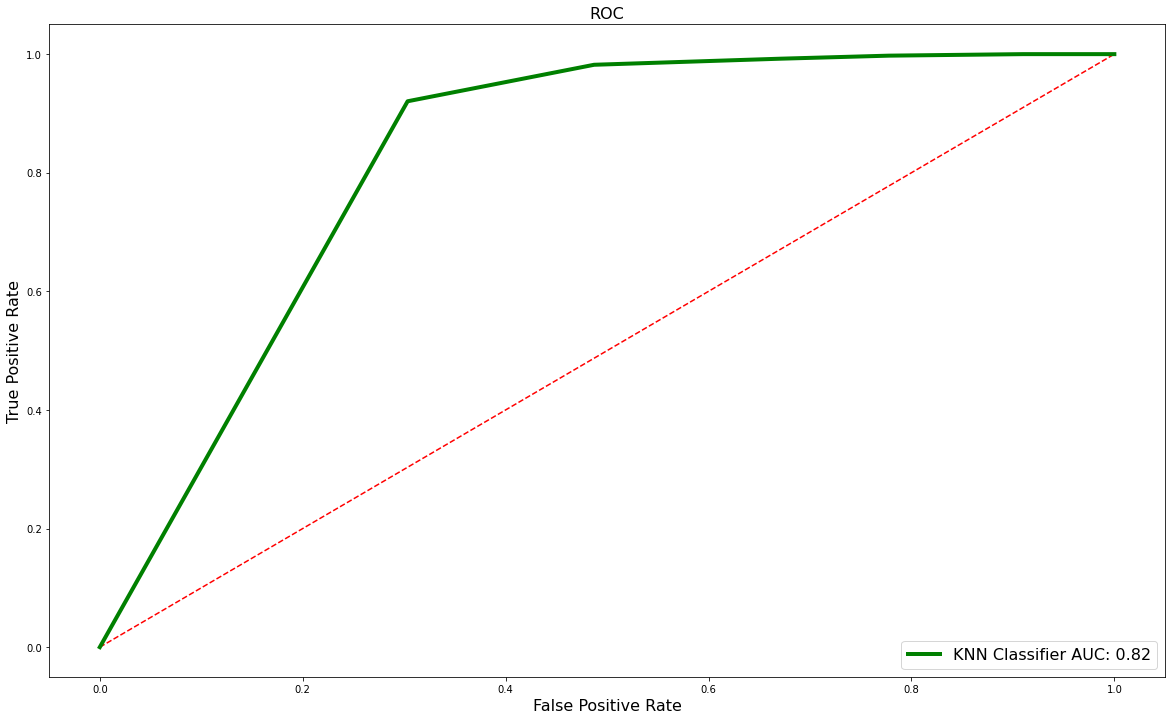

In [9]:
### Model

train_label=deleteLabel(train_label)
test_label=deleteLabel(test_label)

classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
classifier.fit(train_feature,train_label)


from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(train_feature)
X_test = pca.transform(test_feature)
explained_variance = pca.explained_variance_ratio_
print("Variance",explained_variance)

### Predict - multiple values
y_true = test_label
y_pred = classifier.predict(test_feature)

### Metrics
print("KNN 5 neighbors - PCA 2 - 2 Classes")
#### Accuracy
acc = accuracy_score(y_true,y_pred)
print("Accuracy")
print(acc)

#### Confusion matrix
cm = confusion_matrix(y_true,y_pred)
print("Confusion Matrix")
print(cm)

#### True Positive Rate (recall)
print("True Positive Rate")
print(recall_score(y_true, y_pred))

#### True Negative Rate
print("True Negative Rate")
tnr=cm[1][1]/(cm[1][1]+cm[0][1])
print(tnr)

#### False Negative Rate
print("False Negative Rate")
fnr=cm[1][0]/(cm[0][0]+cm[1][0])
print(fnr)

#### False Positif Rate
print("False Positive Rate")
fpr = cm[0][1]/(cm[0][1]+cm[1][1])
print(fpr)

# Cross validation 
#cvs=cross_val_score(classifier,train_feature,train_label,cv=10)
#print("Cross validation score")
#print(cvs)


# ROC
probs =  classifier.predict_proba(test_feature)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

label = 'KNN Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.show()

### KNN 5 neighbors 2 classes

KNN 5 neighbors
Accuracy
0.7435897435897436
Confusion Matrix
[[ 77 157]
 [  3 387]]
True Positive Rate
0.9923076923076923
True Negative Rate
0.7113970588235294
False Negative Rate
0.0375
False Positive Rate
0.28860294117647056


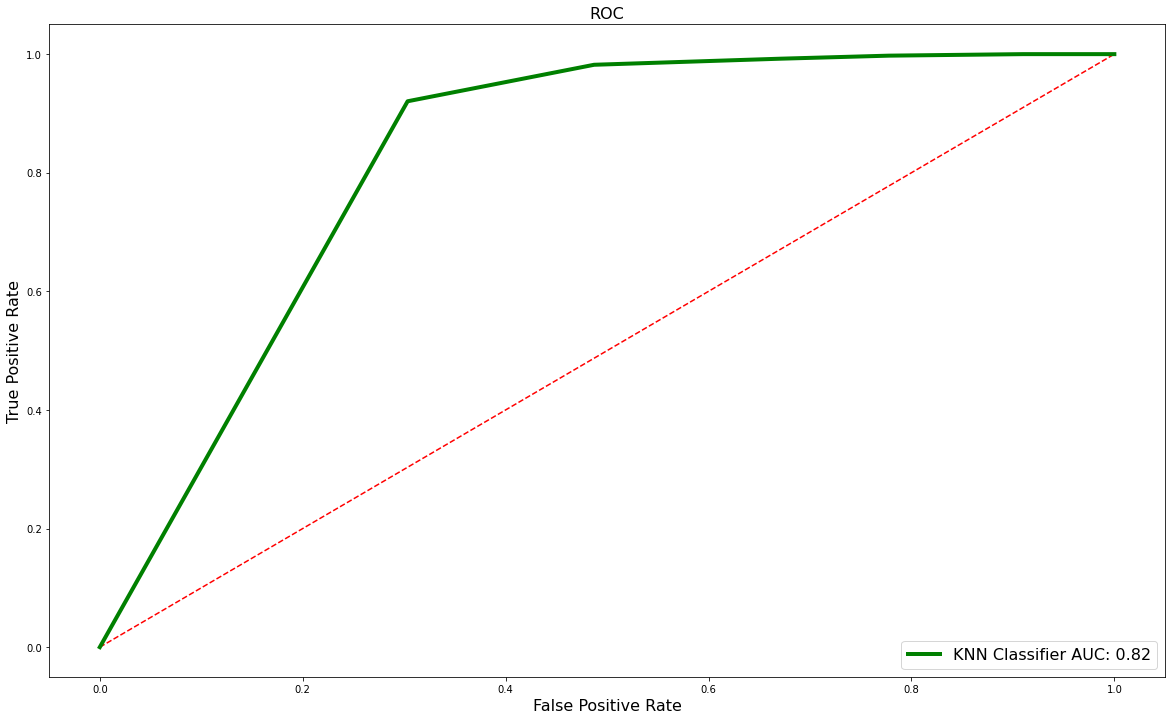

In [8]:
### Model

train_label=deleteLabel(train_label)
test_label=deleteLabel(test_label)

classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
classifier.fit(train_feature,train_label)

### Predict - multiple values
y_true = test_label
y_pred = classifier.predict(test_feature)

### Metrics
print("KNN 5 neighbors")
#### Accuracy
acc = accuracy_score(y_true,y_pred)
print("Accuracy")
print(acc)

#### Confusion matrix
cm = confusion_matrix(y_true,y_pred)
print("Confusion Matrix")
print(cm)

#### True Positive Rate (recall)
print("True Positive Rate")
print(recall_score(y_true, y_pred))

#### True Negative Rate
print("True Negative Rate")
tnr=cm[1][1]/(cm[1][1]+cm[0][1])
print(tnr)

#### False Negative Rate
print("False Negative Rate")
fnr=cm[1][0]/(cm[0][0]+cm[1][0])
print(fnr)

#### False Positif Rate
print("False Positive Rate")
fpr = cm[0][1]/(cm[0][1]+cm[1][1])
print(fpr)

# Cross validation 
#cvs=cross_val_score(classifier,train_feature,train_label,cv=10)
#print("Cross validation score")
#print(cvs)


# ROC
probs =  classifier.predict_proba(test_feature)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

label = 'KNN Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.show()

### KNN 5 neighbors 3 classes

KNN 5 neighbors
Accuracy
0.7435897435897436
Confusion Matrix
[[ 77 157]
 [  3 387]]
True Positive Rate
0.9923076923076923
True Negative Rate
0.7113970588235294
False Negative Rate
0.0375
False Positive Rate
0.28860294117647056


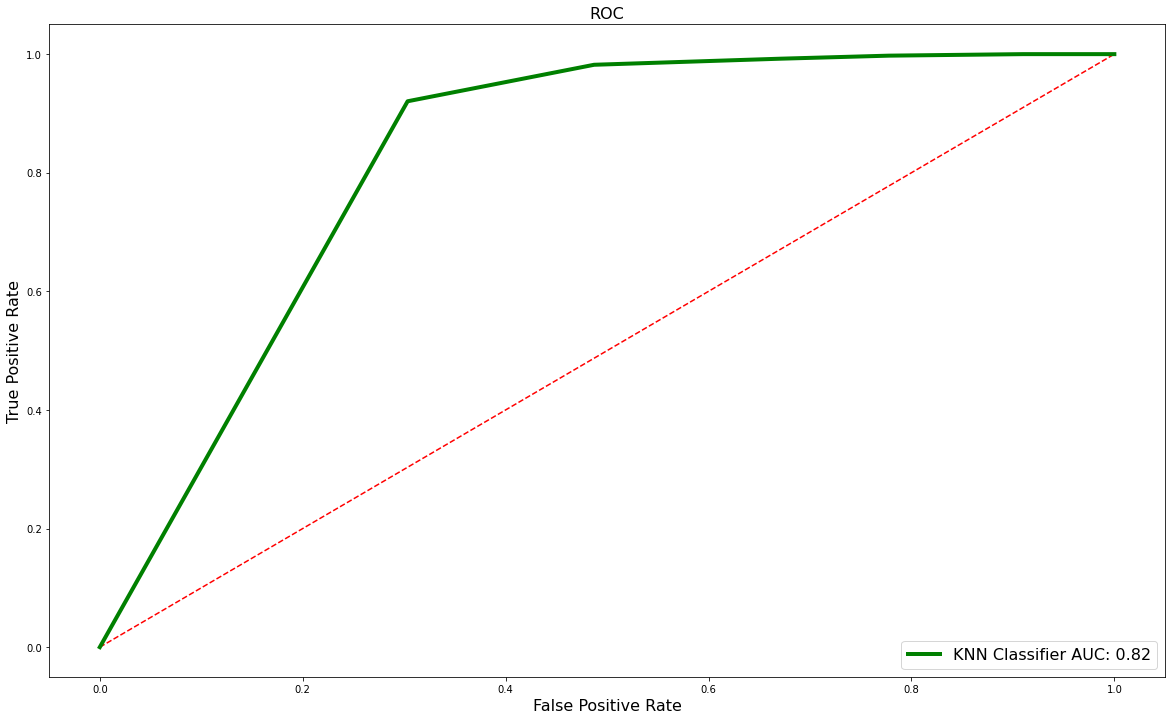

In [9]:
### Model

classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
classifier.fit(train_feature,train_label)

### Predict - multiple values
y_true = test_label
y_pred = classifier.predict(test_feature)

### Metrics
print("KNN 5 neighbors")
#### Accuracy
acc = accuracy_score(y_true,y_pred)
print("Accuracy")
print(acc)

#### Confusion matrix
cm = confusion_matrix(y_true,y_pred)
print("Confusion Matrix")
print(cm)

#### True Positive Rate (recall)
print("True Positive Rate")
print(recall_score(y_true, y_pred))

#### True Negative Rate
print("True Negative Rate")
tnr=cm[1][1]/(cm[1][1]+cm[0][1])
print(tnr)

#### False Negative Rate
print("False Negative Rate")
fnr=cm[1][0]/(cm[0][0]+cm[1][0])
print(fnr)

#### False Positif Rate
print("False Positive Rate")
fpr = cm[0][1]/(cm[0][1]+cm[1][1])
print(fpr)

# Cross validation 
#cvs=cross_val_score(classifier,train_feature,train_label,cv=10)
#print("Cross validation score")
#print(cvs)


# ROC
probs =  classifier.predict_proba(test_feature)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

label = 'KNN Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.show()

### KNN 8 neighbors

KNN 4 neighbors
Accuracy
0.7483974358974359
Confusion Matrix
[[ 81 153]
 [  4 386]]
True Positive Rate
0.9897435897435898
True Negative Rate
0.7161410018552876
False Negative Rate
0.047058823529411764
False Positive Rate
0.28385899814471244


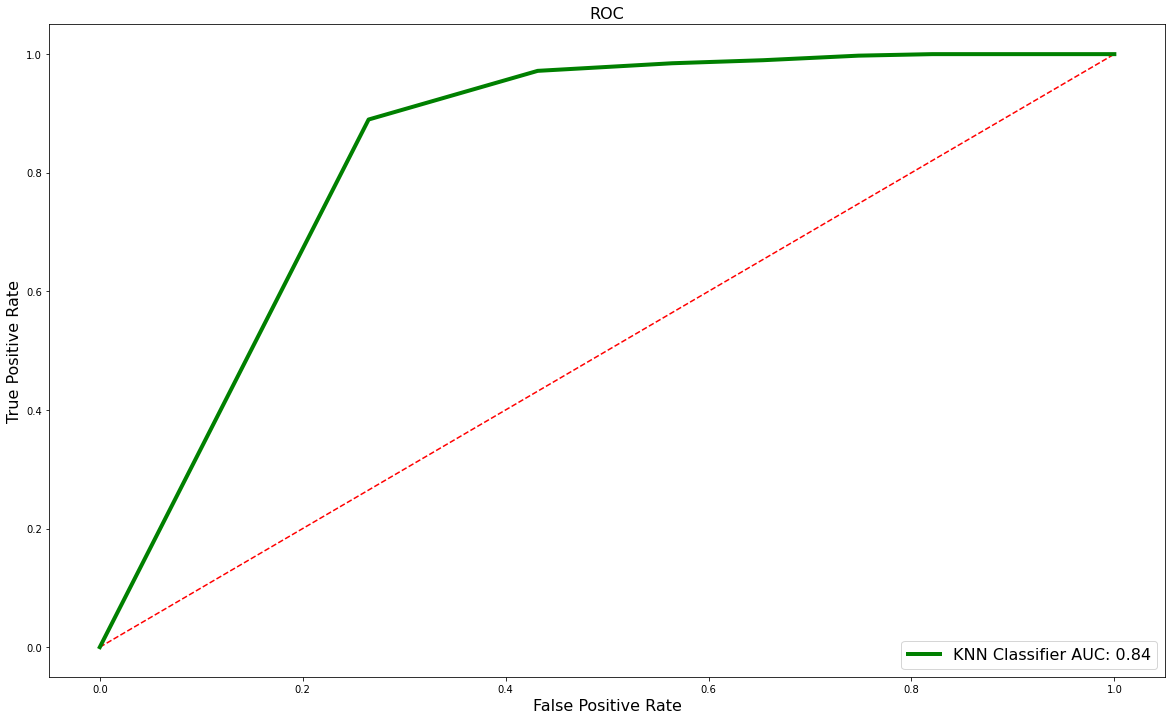

In [18]:
### Model

train_label=deleteLabel(train_label)
test_label=deleteLabel(test_label)

classifier = KNeighborsClassifier(n_neighbors=8, n_jobs=-1)
classifier.fit(train_feature,train_label)


### Predict - multiple values
y_true = test_label
y_pred = classifier.predict(test_feature)

### Metrics
print("KNN 4 neighbors")
#### Accuracy
acc = accuracy_score(y_true,y_pred)
print("Accuracy")
print(acc)

#### Confusion matrix
cm = confusion_matrix(y_true,y_pred)
print("Confusion Matrix")
print(cm)

#### True Positive Rate (recall)
print("True Positive Rate")
print(recall_score(y_true, y_pred))

#### True Negative Rate
print("True Negative Rate")
tnr=cm[1][1]/(cm[1][1]+cm[0][1])
print(tnr)

#### False Negative Rate
print("False Negative Rate")
fnr=cm[1][0]/(cm[0][0]+cm[1][0])
print(fnr)

#### False Positif Rate
print("False Positive Rate")
fpr = cm[0][1]/(cm[0][1]+cm[1][1])
print(fpr)

# Cross validation 
#cvs=cross_val_score(classifier,train_feature,train_label,cv=3)
#print("Cross validation score")
#print(cvs)


# ROC
probs =  classifier.predict_proba(test_feature)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

label = 'KNN Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.show()

## XGBOOST

XGBOOST
Accuracy
0.7323717948717948
Confusion Matrix
[[ 70 164]
 [  3 387]]
True Positive Rate
0.9923076923076923
True Negative Rate
0.7023593466424682
False Negative Rate
0.0410958904109589
False Positive Rate
0.29764065335753176


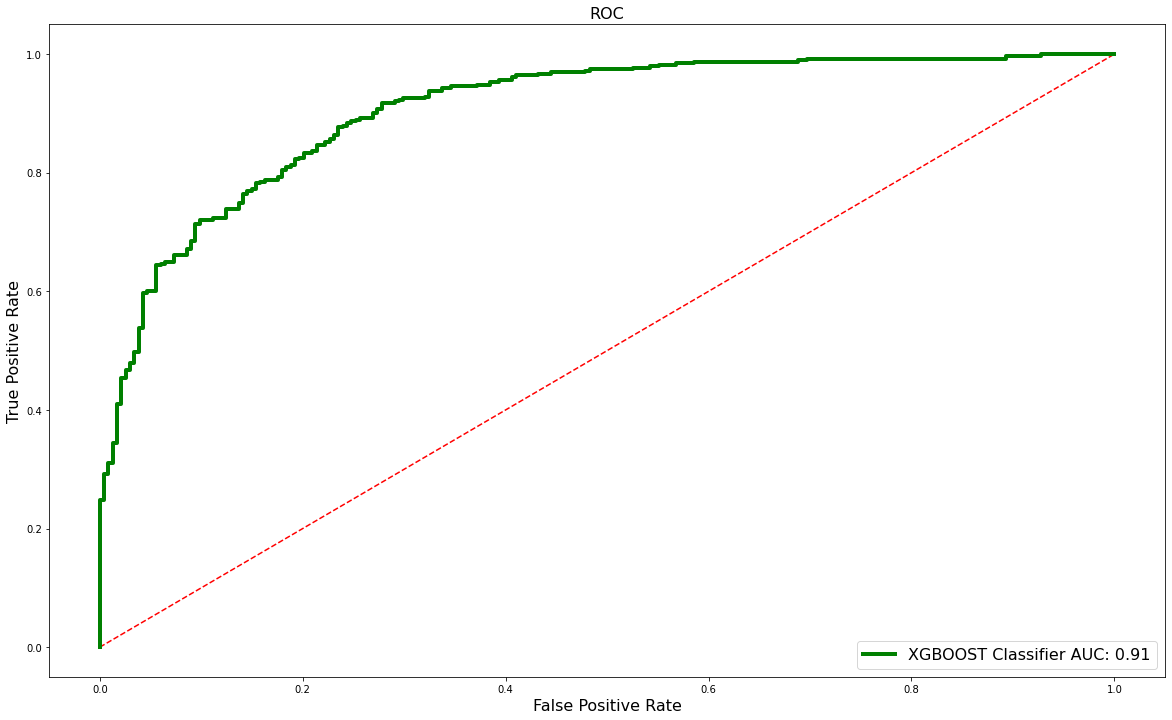

In [19]:
# Libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
!{sys.executable} -m pip install xgboost

### Model
classifier = XGBClassifier()
classifier.fit(np.array(train_feature),np.array(train_label))



### Predict - multiple values
y_true = test_label
y_pred = classifier.predict(test_feature)

### Metrics
print("XGBOOST")
#### Accuracy
acc = accuracy_score(y_true,y_pred)
print("Accuracy")
print(acc)

#### Confusion matrix
cm = confusion_matrix(y_true,y_pred)
print("Confusion Matrix")
print(cm)

#### True Positive Rate (recall)
print("True Positive Rate")
print(recall_score(y_true, y_pred))

#### True Negative Rate
print("True Negative Rate")
tnr=cm[1][1]/(cm[1][1]+cm[0][1])
print(tnr)

#### False Negative Rate
print("False Negative Rate")
fnr=cm[1][0]/(cm[0][0]+cm[1][0])
print(fnr)

#### False Positif Rate
print("False Positive Rate")
fpr = cm[0][1]/(cm[0][1]+cm[1][1])
print(fpr)

# Cross validation 
#cvs=cross_val_score(classifier,train_feature,train_label,cv=3)
#print("Cross validation score")
#print(cvs)


# ROC
probs =  classifier.predict_proba(test_feature)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

label = 'XGBOOST Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.show()

##Random Forest

Random Forest
Accuracy
0.7772435897435898
Confusion Matrix
[[100 134]
 [  5 385]]
True Positive Rate
0.9871794871794872
True Negative Rate
0.7418111753371869
False Negative Rate
0.047619047619047616
False Positive Rate
0.2581888246628131
Cross validation score
[0.95046083 0.93198847 0.92334294]


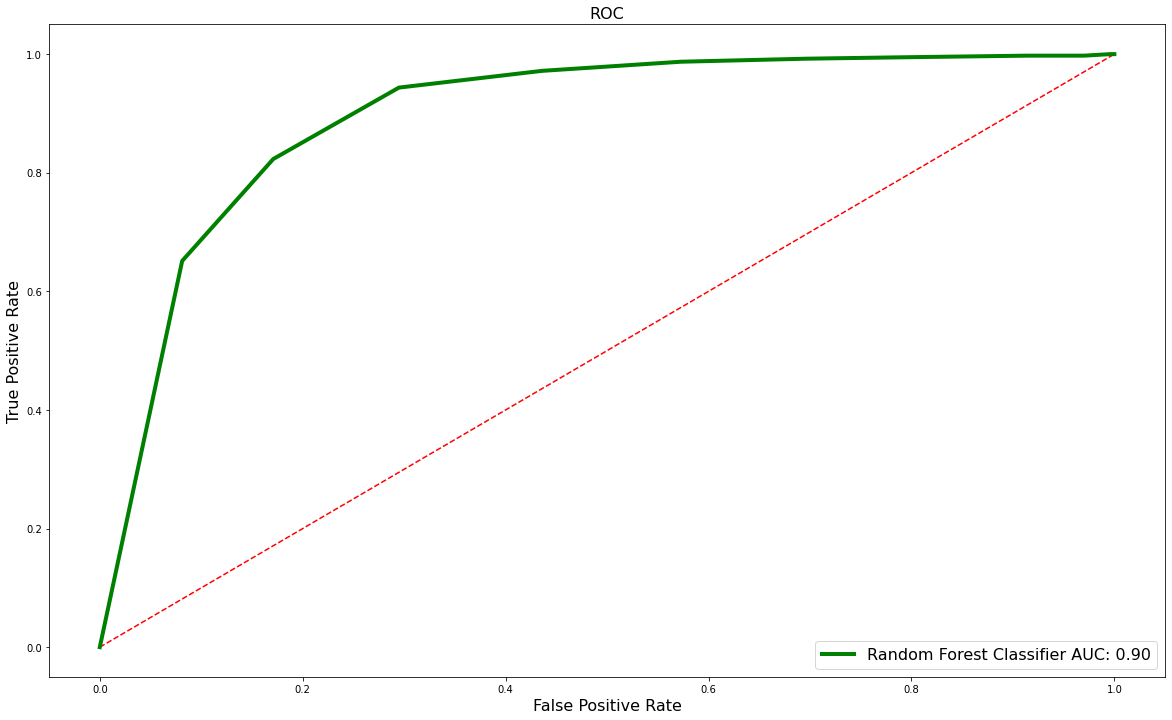

In [15]:
# Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

Scaler= StandardScaler()

train_feature=Scaler.fit_transform(train_feature)
test_feature=Scaler.transform(test_feature)

### Model
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(train_feature,train_label)

### Predict - multiple values
y_true = test_label
y_pred = classifier.predict(test_feature)

### Metrics
print("Random Forest")
#### Accuracy
acc = accuracy_score(y_true,y_pred)
print("Accuracy")
print(acc)

#### Confusion matrix
cm = confusion_matrix(y_true,y_pred)
print("Confusion Matrix")
print(cm)

#### True Positive Rate (recall)
print("True Positive Rate")
print(recall_score(y_true, y_pred))

#### True Negative Rate
print("True Negative Rate")
tnr=cm[1][1]/(cm[1][1]+cm[0][1])
print(tnr)

#### False Negative Rate
print("False Negative Rate")
fnr=cm[1][0]/(cm[0][0]+cm[1][0])
print(fnr)

#### False Positif Rate
print("False Positive Rate")
fpr = cm[0][1]/(cm[0][1]+cm[1][1])
print(fpr)

# Cross validation 
cvs=cross_val_score(classifier,train_feature,train_label,cv=3)
print("Cross validation score")
print(cvs)


# ROC
probs =  classifier.predict_proba(test_feature)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

label = 'Random Forest Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.show()